In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import copy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class ContainerWaterPrediction:
    def __init__(self, WaterData, division_rate=0.7, window_step=1):
        self.m_sData = WaterData
        self.m_division_rate = division_rate
        self.m_window_step = window_step
        self.Prepare_Data()

    def Prepare_Data(self):
        self.Setup_Scaler()
        self.Divide_Data()
        self.m_trainX, self.m_trainY = self.Make_Dataset(self.m_TrainData)
        self.m_trainX = np.reshape(self.m_trainX, (self.m_trainX.shape[0], self.m_trainX.shape[1]))
        self.m_testX, self.m_testY = self.Make_Dataset(self.m_TestData)
        self.m_testX = np.reshape(self.m_testX, (self.m_testX.shape[0], self.m_testX.shape[1]))

    def Setup_Scaler(self):
        self.m_Scaler = MinMaxScaler()
        self.m_sDataScaled = self.m_Scaler.fit_transform(self.m_sData)

    def Divide_Data(self):
        size_sDataScaled = len(self.m_sDataScaled)
        div_pos = int(size_sDataScaled * self.m_division_rate)
        self.m_TrainData = self.m_sDataScaled[0:div_pos, :]
        self.m_TestData = self.m_sDataScaled[div_pos:size_sDataScaled, :]

    def Make_Dataset(self, dataset):
        data_x = []
        data_y = []
        for i in range(len(dataset) - self.m_window_step - 1):
            slice = dataset[i:(i + self.m_window_step), 0]
            data_x.append(slice)
            data_y.append(dataset[i + self.m_window_step, 0])
        data_x = np.array(data_x)
        data_y = np.array(data_y)
        return data_x, data_y

    def Build_ML(self, epoch_val=10):
        self.m_Model = Sequential()
        self.m_Model.add(Dense(256, input_shape=(self.m_window_step,)))
        self.m_Model.add(Dense(128, activation='relu'))
        self.m_Model.add(Dense(64, activation='relu'))
        self.m_Model.add(Dense(1))
        self.m_Model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
        self.m_Model.summary()
        self.m_Model.fit(self.m_trainX, self.m_trainY, epochs=epoch_val, batch_size=1, verbose=1)

    def Evaluate_ML(self):
        score = self.m_Model.evaluate(self.m_trainX, self.m_trainY, verbose=0)
        print('Mean Squared Error = ', score)

    def Predict_ML(self):
        self.m_TrainEstimated = self.m_Model.predict(self.m_trainX)
        self.m_TestEstimated = self.m_Model.predict(self.m_testX)
        self.m_TrainEstimated = self.m_Scaler.inverse_transform(self.m_TrainEstimated)
        self.m_TestEstimated = self.m_Scaler.inverse_transform(self.m_TestEstimated)

    def Generate_Graph(self):
        plt.plot(self.m_Scaler.inverse_transform(self.m_sDataScaled), label='Original Data')
        plt.plot(self.m_TrainEstimated, label='Train Prediction')
        plt.plot(len(self.m_TrainEstimated) + np.arange(1, len(self.m_TestEstimated)+1), self.m_TestEstimated, label='Test Prediction')
        plt.legend()
        plt.xlabel('Time')
        plt.ylabel('Container Quantity')
        plt.title('Container Quantity Prediction')
        plt.show()

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/ICT/bs.csv'

data = pd.read_csv(file_path, encoding='cp949', header = 0, parse_dates=True, index_col='Date')

In [ ]:
data

,수입(TEU),수출(TEU),수입환적(TEU),수출환적(TEU),수입물가지수,usd비율(Yuan/US),Dubai국제유가(US/배럴),강수량(mm),평균기온,평균최저기온,평균최고기온
Date,,,,,,,,,,,
1.Jan,353916.0,365515.0,408239.0,389980.0,128.15,6.105,104.0,9.6,5.0,1.2,9.7
1.Feb,334478.0,334191.0,313752.0,350400.0,128.34,6.121,105.0,44.1,5.8,2.7,9.9
1.Mar,405896.0,402861.0,410436.0,383564.0,127.66,6.152,104.4,136.7,9.8,6.2,14.5
1.Apr,391682.0,402607.0,390004.0,401684.0,127.56,6.158,104.6,147.8,14.6,11.2,19.3
1.May,396794.0,395189.0,402279.0,388978.0,127.70,6.169,105.6,145.9,18.7,15.4,23.2
...,...,...,...,...,...,...,...,...,...,...,...
1.Mar,493589.0,465645.0,550140.0,540680.0,121.61,6.869,78.5,76.2,12.3,8.5,17.0
1.Apr,462679.0,467042.0,535107.0,552678.0,120.72,6.923,83.4,101.6,14.6,11.0,19.0
1.May,470224.0,470912.0,513907.0,515848.0,116.48,7.109,75.0,290.7,17.9,14.9,21.6


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               512       
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 41,729
Trainable params: 41,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
78/78 [==============================] - 1s 2ms/step - loss: 0.0485 - mse: 0.0485
Epoch 2/50
78/78 [==============================] - 0s 2ms/step - loss: 0.0326 - mse: 0.032

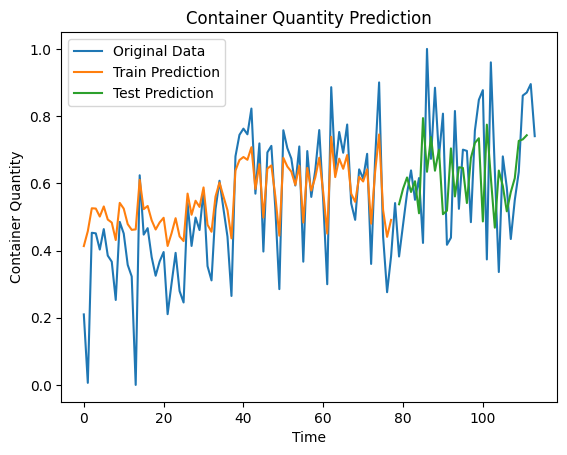

In [ ]:
# file_path = '/content/drive/MyDrive/Colab Notebooks/ICT/bs.csv'

# data = pd.read_csv(file_path, encoding='cp949')

# data['수출(TEU)'] = data['수출(TEU)'].str.replace(',', '').astype(float)
container_quantity_data = data['수출(TEU)'].values

scaler = MinMaxScaler()

container_quantity_data = scaler.fit_transform(container_quantity_data.reshape(-1, 1))

container_prediction_model = ContainerWaterPrediction(container_quantity_data)

container_prediction_model.Build_ML(epoch_val=50)

container_prediction_model.Evaluate_ML()

container_prediction_model.Predict_ML()

container_prediction_model.Generate_Graph()